In [190]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import numpy as np
import seaborn as sns

In [191]:
semAtaque = pd.read_csv('livreAtaque.csv')
ataque = pd.read_csv('sofreuAtaque.csv')

dfJogos = pd.read_csv('Jogos.csv')
valores_nulos_por_coluna = dfJogos.isnull().sum()

# Exibir a contagem de valores nulos por coluna
dfJogos.dropna(subset=['plataforms'], inplace=True)
dfJogos.fillna(0, inplace=True)


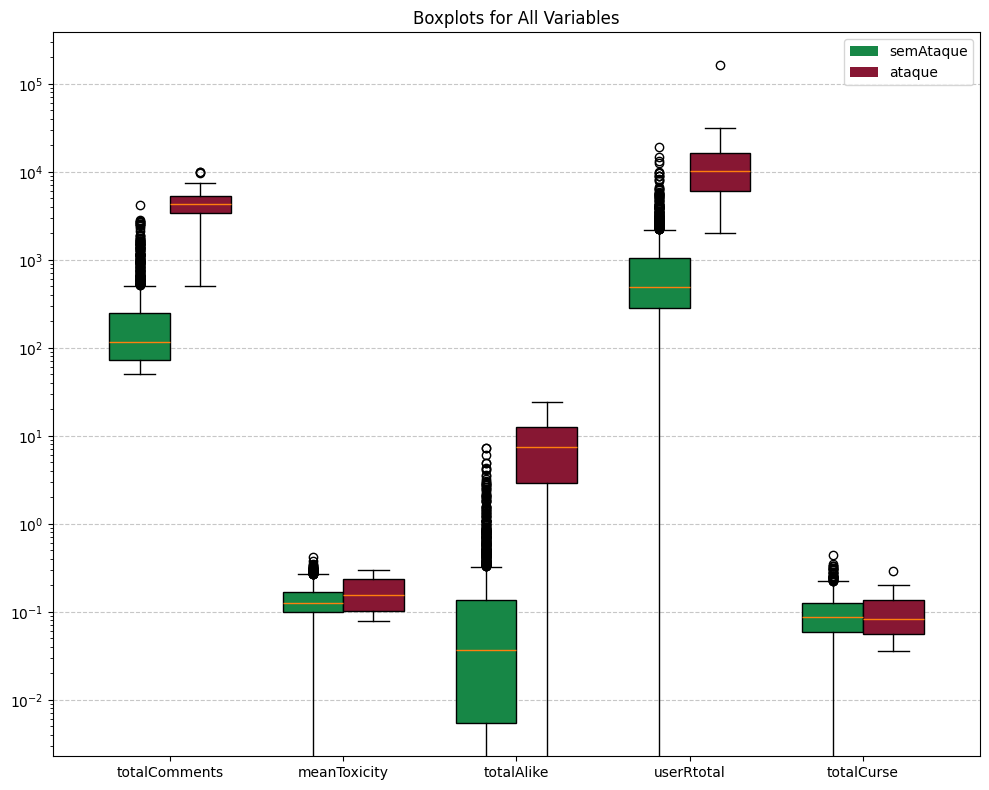

In [192]:
variables = ['totalComments', 'meanToxicity', 'totalAlike', 'userRtotal', 'totalCurse']

plt.figure(figsize=(10, 8))

positions = list(range(len(variables)))
width = 0.35

colors = ['#178746', '#871733']


for i, variable in enumerate(variables):
    semAtaque_data = semAtaque[variable]
    ataque_data = ataque[variable]
    
    semAtaque_positions = [p - width/2 for p in positions]
    ataque_positions = [p + width/2 for p in positions]
    
    plt.boxplot(semAtaque_data, positions=[semAtaque_positions[i]], patch_artist=True, boxprops=dict(facecolor=colors[0]), widths=width)
    plt.boxplot(ataque_data, positions=[ataque_positions[i]], patch_artist=True, boxprops=dict(facecolor=colors[1]), widths=width)

plt.xticks(positions, variables)
plt.title('Boxplots for All Variables')
plt.yscale('log')  # Set y-axis to log scale
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add vertical grid lines

# Create legend
legend_elements = [Patch(facecolor=colors[0], label='semAtaque'), Patch(facecolor=colors[1], label='ataque')]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

In [193]:
dfJogos['platform'] = dfJogos['plataforms'].str.split(', ')
dfJogos = dfJogos[dfJogos['meanToxicity'] > 0]
# Explode the DataFrame to separate rows for each platform
df_exploded = dfJogos.explode('platform')
df_exploded['platform'] = df_exploded['platform'].str.replace(r"[\[\]']", "", regex=True)
# Get unique platforms
unique_platforms = df_exploded['platform'].unique()
print(unique_platforms)

['PlayStation 4' 'Nintendo Switch' 'PC' 'Xbox Series X' 'PlayStation 3'
 'PlayStation Vita' 'Wii U' 'Xbox One' 'Xbox 360' 'PlayStation 2'
 'Game Boy Advance' 'GameCube' 'Xbox' 'DS' 'iOS (iPhone/iPad)' 'PSP'
 'PlayStation' 'PlayStation 5' '3DS' 'Wii' 'Nintendo 64' 'Dreamcast']


In [194]:
platform_mapping = {
    'PlayStation 4': 'PlayStation',
    'PlayStation 3': 'PlayStation',
    'PlayStation 2': 'PlayStation',
    'PSP': 'PlayStation',
    'PlayStation Vita': 'PlayStation',
    'PlayStation': 'PlayStation',
    'PlayStation 5': 'PlayStation',
    
    'Xbox Series X': 'Xbox',
    'Xbox One': 'Xbox',
    'Xbox 360': 'Xbox',
    'Xbox': 'Xbox',

    'iOS (iPhone/iPad)': 'Mobile',
    'PC': 'PC',

    'GameCube': 'Nintendo',
    'Wii U': 'Nintendo',
    'Game Boy Advance': 'Nintendo',
    'DS': 'Nintendo',
    'Nintendo Switch': 'Nintendo',
    '3DS': 'Nintendo',
    'Wii': 'Nintendo',
    'Nintendo 64': 'Nintendo',
    
    'Dreamcast': 'Sega'
}
df_exploded['platform'] = df_exploded['platform'].replace(platform_mapping)

In [196]:
print(df_exploded['platform'].value_counts())

platform
PlayStation    9508
PC             7991
Xbox           6331
Nintendo       6227
Mobile         1453
Sega            143
Name: count, dtype: int64


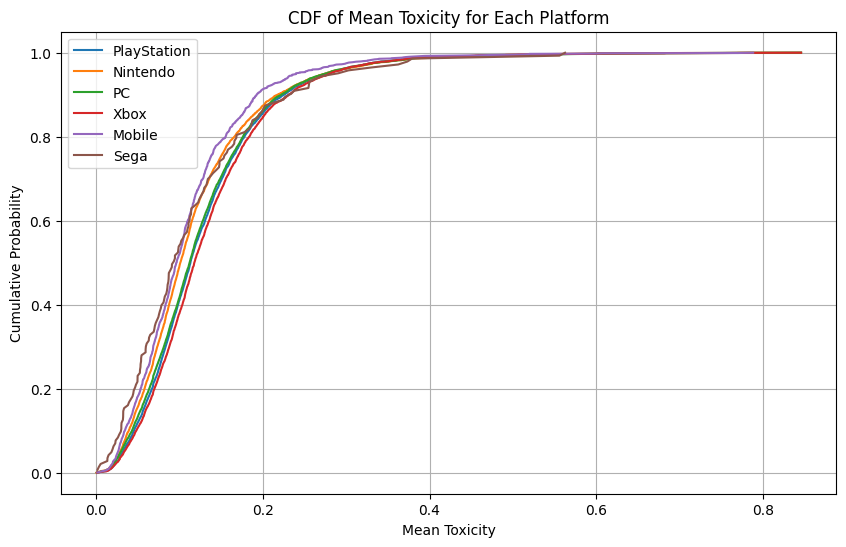

In [195]:
# Plot CDF for each unique platform
plt.figure(figsize=(10, 6))
unique_platforms = df_exploded['platform'].unique()

for platform in unique_platforms:
    # Select rows for the current platform
    platform_data = df_exploded[df_exploded['platform'] == platform]
    # Calculate CDF
    x = np.sort(platform_data['meanToxicity'])
    y = np.arange(1, len(x) + 1) / len(x)
    # Plot CDF
    plt.plot(x, y, label=platform)

plt.title('CDF of Mean Toxicity for Each Platform')
plt.xlabel('Mean Toxicity')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()